# Ex - GroupBy

### Introduction:

GroupBy can be summarized as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [27]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
df_drinks = pd.read_csv(url, keep_default_na=False)
df_drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Step 4. Which continent drinks more beer on average?

In [28]:
df_drinks.groupby('continent').mean().sort_values(by='beer_servings', ascending=False).head(1)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
EU,193.777778,132.555556,142.222222,8.617778


In [29]:
df_drinks.groupby('continent').mean().sort_values(by='beer_servings', ascending=False)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
EU,193.777778,132.555556,142.222222,8.617778
SA,175.083333,114.750000,62.416667,6.308333
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455


### Step 5. For each continent print the statistics for wine consumption.

In [30]:
df_drinks.groupby('continent').describe().wine_servings

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
NA,23.0,24.521739,28.266378,1.0,5.0,11.0,34.00,100.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [31]:
import matplotlib.pyplot as plt

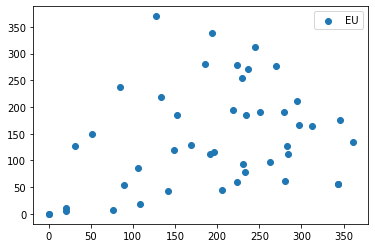

In [32]:
df_g = df_drinks.groupby('continent')
df_eu = df_g.get_group('EU')
plt.scatter(x='beer_servings', y='wine_servings', data=df_eu, label='EU')
plt.legend()

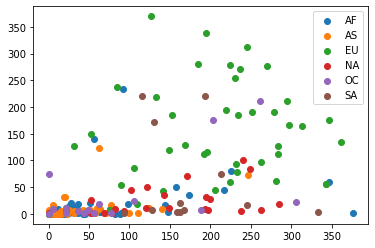

In [33]:
for continent in df_g:
    plt.scatter(x='beer_servings', y='wine_servings', data=df_g.get_group(continent[0]), label=continent[0])
plt.legend()

### Step 6. Print the mean alcohol consumption per continent for every column

In [34]:
df_g.mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Print the median alcohol consumption per continent for every column

In [35]:
df_g.median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
NA,143.0,137.0,11.0,6.30
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [38]:
df_g.spirit_servings.describe()[['mean','min','max']]

,mean,min,max
continent,,,
AF,16.339623,0.0,152.0
AS,60.840909,0.0,326.0
EU,132.555556,0.0,373.0
NA,165.739130,68.0,438.0
OC,58.437500,0.0,254.0
SA,114.750000,25.0,302.0
